In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Droping object columns

In [8]:
df = df.drop('Name', axis=1)
df = df.drop('Ticket', axis=1)
df = df.drop('Fare', axis=1)
df = df.drop('Cabin', axis=1)
df = df.drop('PassengerId', axis=1)

In [9]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [10]:
df['Family'] = df['SibSp'] + df['Parch'] + 1

In [11]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Family
0,0,3,male,22.0,1,0,S,2
1,1,1,female,38.0,1,0,C,2
2,1,3,female,26.0,0,0,S,1
3,1,1,female,35.0,1,0,S,2
4,0,3,male,35.0,0,0,S,1
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S,1
887,1,1,female,19.0,0,0,S,1
888,0,3,female,NaN,1,2,S,4
889,1,1,male,26.0,0,0,C,1


In [12]:
df = df.drop('SibSp', axis=1,)
df = df.drop('Parch', axis=1,)

In [13]:
df.head()

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,male,22.0,S,2
1,1,1,female,38.0,C,2
2,1,3,female,26.0,S,1
3,1,1,female,35.0,S,2
4,0,3,male,35.0,S,1


# Cleaning the Data

In [14]:
df.isnull().values.any()

True

In [15]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Embarked      2
Family        0
dtype: int64

In [16]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [17]:
df["Embarked"] = df["Embarked"].fillna("S")

In [18]:
df.head()

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,male,22.0,S,2
1,1,1,female,38.0,C,2
2,1,3,female,26.0,S,1
3,1,1,female,35.0,S,2
4,0,3,male,35.0,S,1


In [19]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Embarked    0
Family      0
dtype: int64

In [20]:
df.Embarked.replace(['S', 'C', 'Q'], [1, 2, 3], inplace=True)

In [21]:
df.Sex.replace(['male','female'], [1,0], inplace=True)

In [22]:
df.head()

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,1,22.0,1,2
1,1,1,0,38.0,2,2
2,1,3,0,26.0,1,1
3,1,1,0,35.0,1,2
4,0,3,1,35.0,1,1


# EDA Apply

## 2-D Scatter Plot

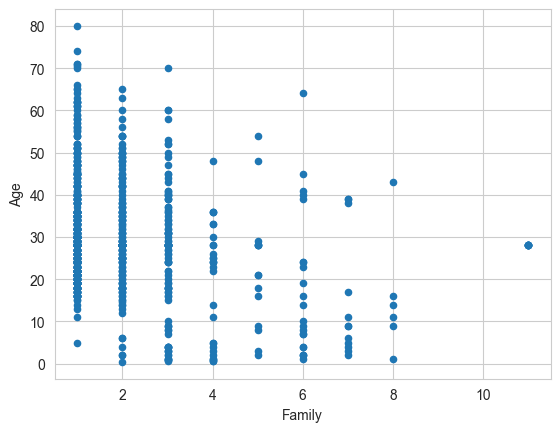

In [28]:
df.plot(kind='scatter', x='Family', y='Age') ;
plt.show()

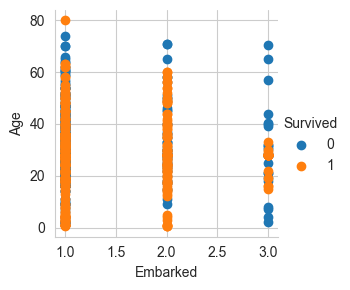

In [29]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Survived").map(plt.scatter, "Embarked", "Age").add_legend();
plt.show();

# Pair-plot

C:\Users\RealTime\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


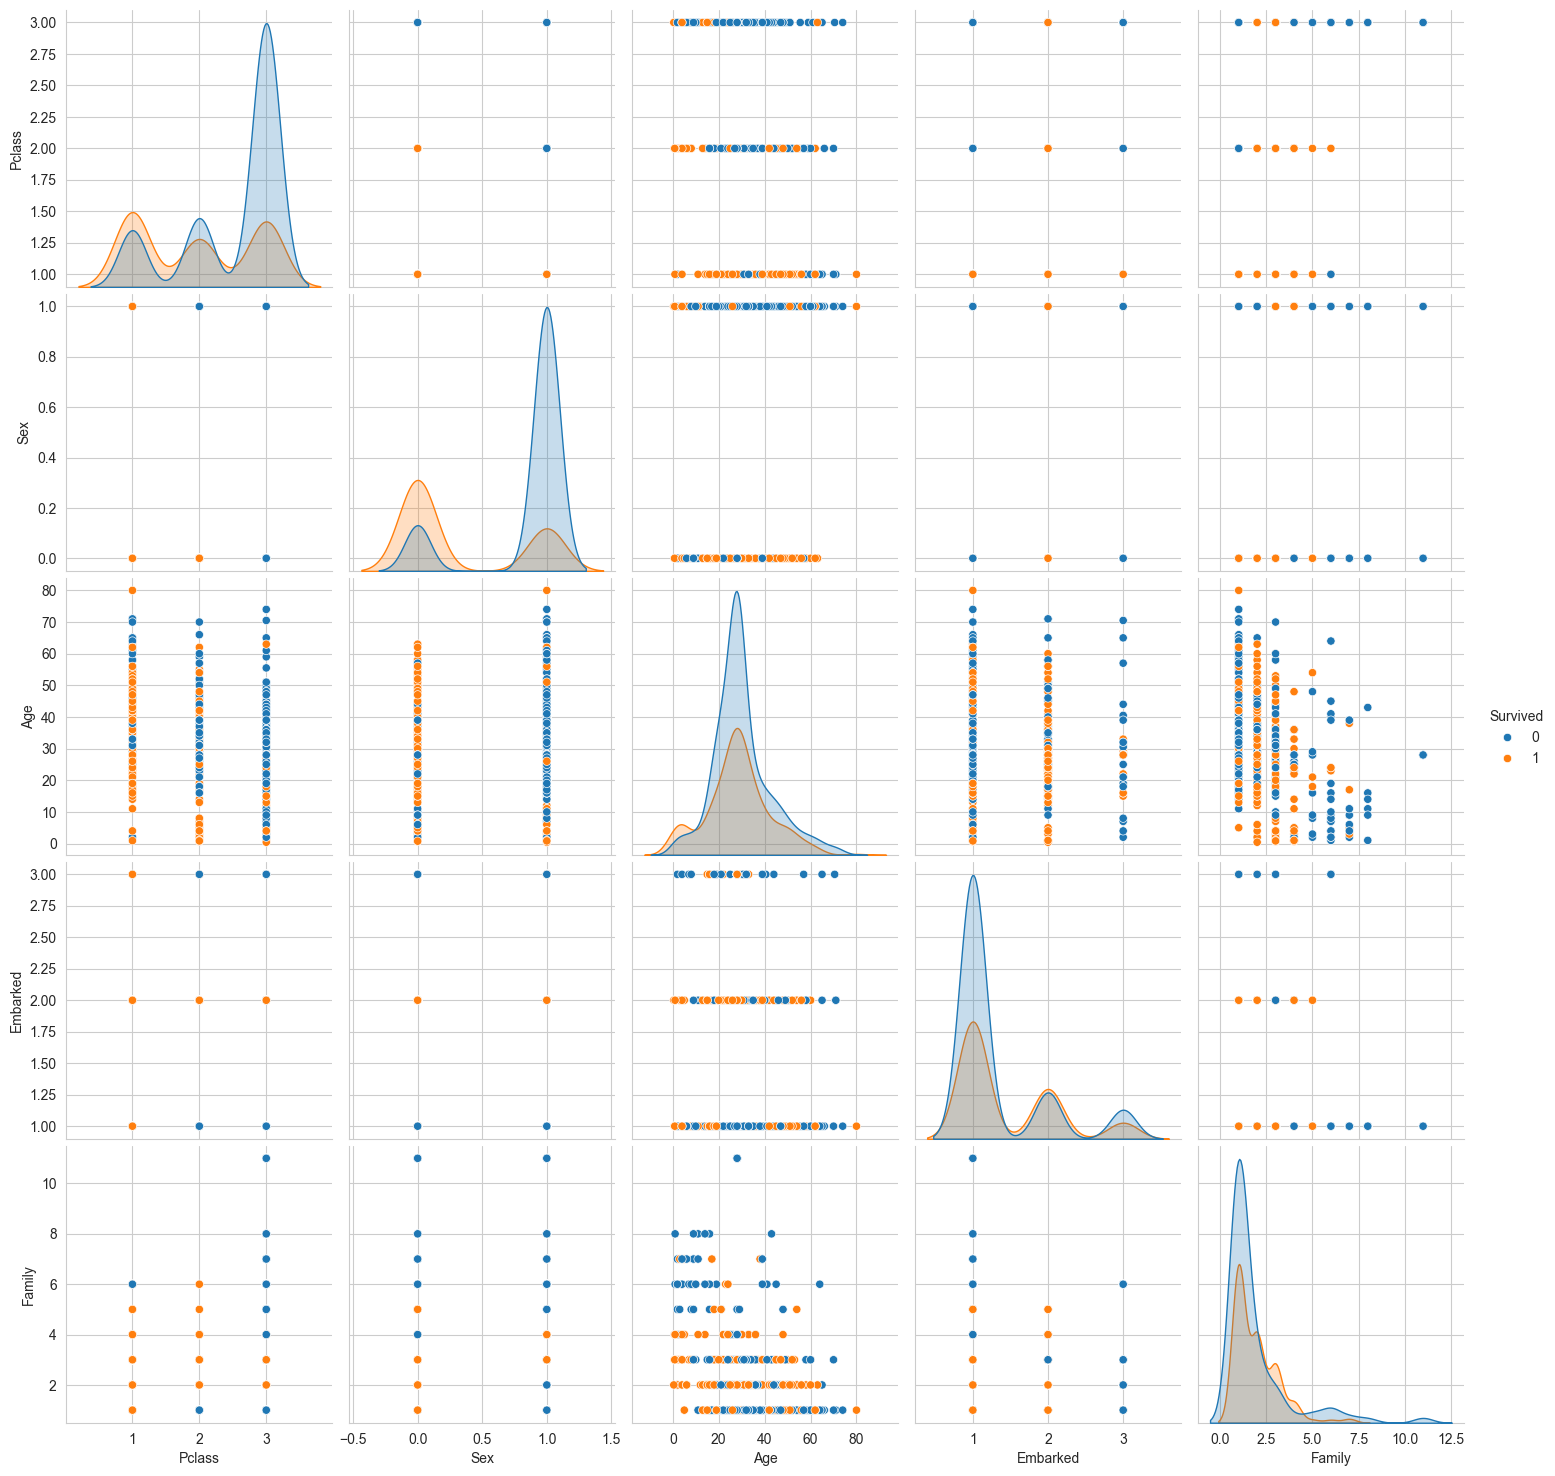

In [27]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="Survived", size=3);
plt.show()

# Histogram, PDF, CDF

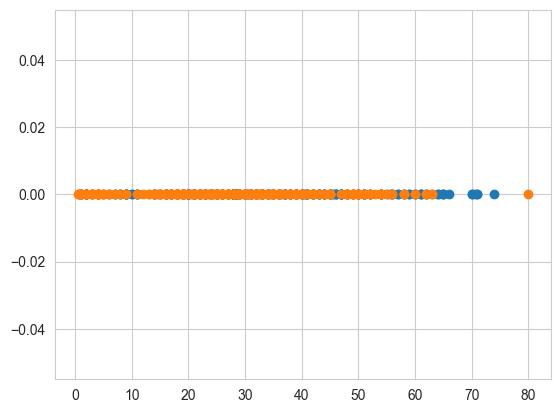

In [35]:
import numpy as np
df_1 = df.loc[df["Survived"] == 0];
df_2 = df.loc[df["Survived"] == 1];

#print(iris_setosa["petal_length"])
plt.plot(df_1["Age"], np.zeros_like(df_1['Age']), 'o')
plt.plot(df_2["Age"], np.zeros_like(df_2['Age']), 'o')

plt.show()

C:\Users\RealTime\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\RealTime\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, *

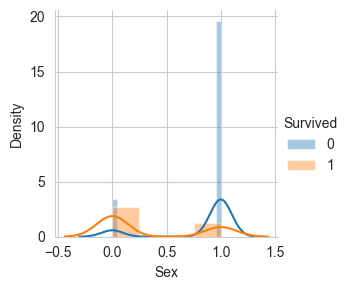

In [39]:
sns.FacetGrid(df, hue="Survived") \
   .map(sns.distplot, "Sex") \
   .add_legend();
plt.show();

In [36]:
df.head()

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,1,22.0,1,2
1,1,1,0,38.0,2,2
2,1,3,0,26.0,1,1
3,1,1,0,35.0,1,2
4,0,3,1,35.0,1,1


C:\Users\RealTime\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\RealTime\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, *

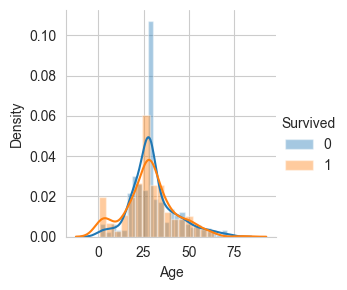

In [40]:
sns.FacetGrid(df, hue="Survived") \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.show();

C:\Users\RealTime\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\RealTime\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, *

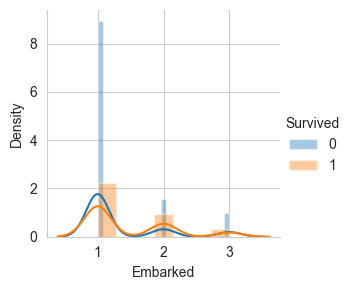

In [41]:
sns.FacetGrid(df, hue="Survived") \
   .map(sns.distplot, "Embarked") \
   .add_legend();
plt.show();

C:\Users\RealTime\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\RealTime\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, *

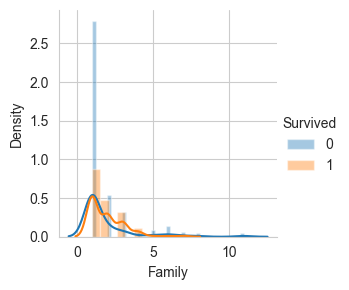

In [42]:
sns.FacetGrid(df, hue="Survived") \
   .map(sns.distplot, "Family") \
   .add_legend();
plt.show();

In [46]:
df.head()

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,1,22.0,1,2
1,1,1,0,38.0,2,2
2,1,3,0,26.0,1,1
3,1,1,0,35.0,1,2
4,0,3,1,35.0,1,1


[0.14571949 0.         0.         0.         0.         0.17668488
 0.         0.         0.         0.67759563]
[1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3. ]
[0.39766082 0.         0.         0.         0.         0.25438596
 0.         0.         0.         0.34795322]
[1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3. ]


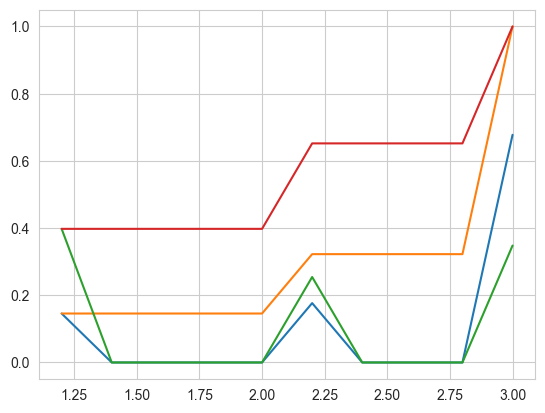

In [47]:
counts, bin_edges = np.histogram(df_1['Pclass'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(df_2['Pclass'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

[0.14754098 0.         0.         0.         0.         0.
 0.         0.         0.         0.85245902]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.68128655 0.         0.         0.         0.         0.
 0.         0.         0.         0.31871345]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


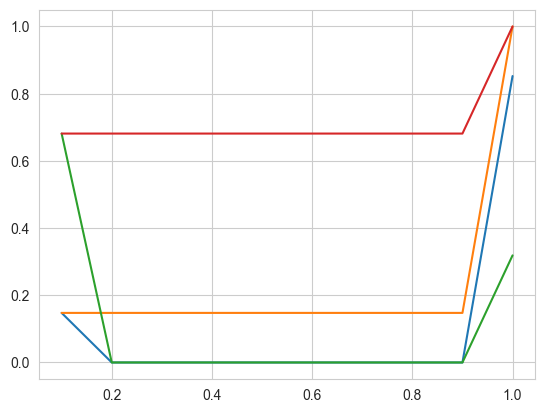

In [48]:
counts, bin_edges = np.histogram(df_1['Sex'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(df_2['Sex'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

[0.03278689 0.0291439  0.18032787 0.428051   0.11657559 0.08196721
 0.06921676 0.0273224  0.02367942 0.01092896]
[ 1.   8.3 15.6 22.9 30.2 37.5 44.8 52.1 59.4 66.7 74. ]
[0.10526316 0.05555556 0.18421053 0.34210526 0.15204678 0.07017544
 0.06140351 0.02631579 0.         0.00292398]
[ 0.42   8.378 16.336 24.294 32.252 40.21  48.168 56.126 64.084 72.042
 80.   ]


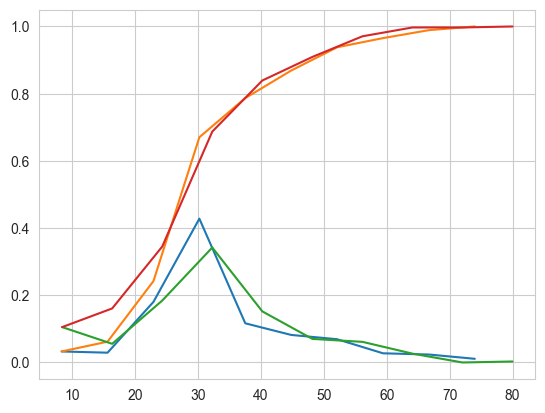

In [49]:
counts, bin_edges = np.histogram(df_1['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(df_2['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

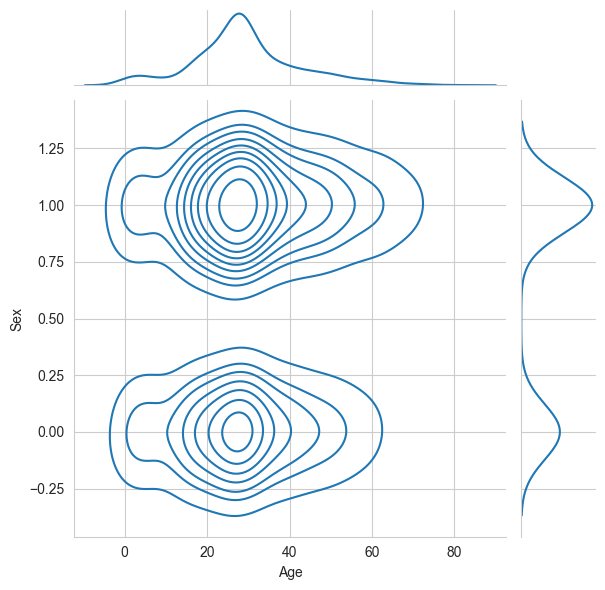

In [51]:
#2D Density plot, contors-plot
sns.jointplot(x="Age", y="Sex", data=df, kind="kde");
plt.show();